## True AlexNet implementation with generator and RGB images
Each image 320x240x3

In [1]:
import tensorflow as tf
from tensorflow.python.client import device_lib
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 12061057580224775218, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 356122624
 locality {
   bus_id: 1
 }
 incarnation: 15189357437235419387
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:1e.0, compute capability: 3.7"]

In [2]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint
from keras.utils.vis_utils import plot_model
from sklearn.utils import shuffle
from keras import backend as K
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [9]:
width, height = 320, 240
train_data_dir = '../gen_x3/train'
test_data_dir = '../gen_x3/test'
nb_train_samples = 47232
nb_test_samples = 11808
epochs = 20
batch_size = 64

input_shape = (width, height, 3)

In [4]:
model = Sequential()
model.add(Conv2D(96, kernel_size=(11, 11), strides=(4, 4), input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(384, (3, 3), activation='relu'))
model.add(Conv2D(384, (3, 3), activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dense(6, activation='softmax'))

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [5]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [6]:
# summarize model and apply checkpoints
print(model.summary())
filepath = 'generator_True_AlexNet-{epoch:02d}-{loss:.4f}.h5'
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 78, 58, 96)        34944     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 39, 29, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 35, 25, 256)       614656    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 12, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 10, 384)       885120    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 8, 384)        1327488   
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 8, 384)        0         
__________

In [10]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.20,
    zoom_range=0.15,
    fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [11]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(width, height),
    batch_size=batch_size,
    class_mode='categorical',
    classes=['1', '2', '3', '4', '5', '6'],
    shuffle=True,
    seed=2018)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(width, height),
    batch_size=batch_size,
    class_mode='categorical',
    classes=['1', '2', '3', '4', '5', '6'],
    shuffle=True,
    seed=2018)

Found 47232 images belonging to 6 classes.
Found 11808 images belonging to 6 classes.


In [12]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    verbose=1,
    callbacks=callbacks_list,
    shuffle=True,
    validation_data=test_generator,
    validation_steps=nb_test_samples // batch_size)

Epoch 1/20
738/738 [==============================] - 680s 921ms/step - loss: 1.7925 - acc: 0.1666 - val_loss: 1.7919 - val_acc: 0.1669
Epoch 2/20
738/738 [==============================] - 612s 830ms/step - loss: 1.7919 - acc: 0.1612 - val_loss: 1.7918 - val_acc: 0.1664
Epoch 3/20
738/738 [==============================] - 613s 830ms/step - loss: 1.7919 - acc: 0.1641 - val_loss: 1.7918 - val_acc: 0.1666
Epoch 4/20
738/738 [==============================] - 612s 829ms/step - loss: 1.7918 - acc: 0.1652 - val_loss: 1.7919 - val_acc: 0.1664
Epoch 5/20
738/738 [==============================] - 615s 833ms/step - loss: 1.7919 - acc: 0.1636 - val_loss: 1.7918 - val_acc: 0.1669
Epoch 6/20
738/738 [==============================] - 613s 831ms/step - loss: 1.7919 - acc: 0.1644 - val_loss: 1.7918 - val_acc: 0.1664
Epoch 7/20
738/738 [==============================] - 613s 831ms/step - loss: 1.7919 - acc: 0.1648 - val_loss: 1.7918 - val_acc: 0.1668
Epoch 8/20
738/738 [============================

In [13]:
score = model.evaluate_generator(test_generator)
print("Accuracy: %.2f%%" % (score[1]*100))
print('Test loss:', score[0])
print('Test accuracy', score[1])

Accuracy: 16.67%
Test loss: 1.7918100508894055
Test accuracy 0.16666666666666666


In [14]:
model_json = model.to_json()
with open('generator_True_AlexNet_model.json', 'w') as json_file:
    json_file.write(model_json)
    
model.save_weights('generator_True_AlexNet_weights.h5')
print('Saved model weights')

Saved model weights


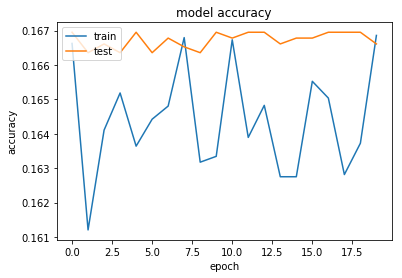

In [15]:
#summarize for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

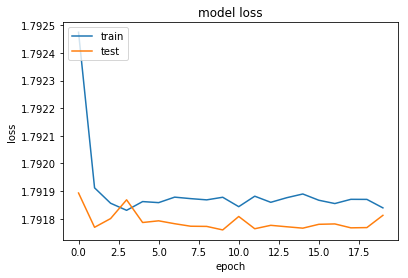

In [16]:
#summarize for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()